In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Установка параметров для игнорирования предупреждений
warnings.filterwarnings('ignore')

from IPython.display import display

pd.set_option('display.width', 200)

# Установка цветов и размера графиков
sns.set_palette('bright')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Загрузка данных
data = pd.read_csv('data\\train.csv')
test = pd.read_csv('data\\test.csv')

In [11]:
# Проверка пропусков по столбцам в дата
missing_values = data.isnull().sum()

# Вывод количества пропусков по каждому столбцу
print("Количество пропусков по столбцам:")
print(missing_values)

Количество пропусков по столбцам:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# Проверка пропусков по столбцам в тест
missing_values = test.isnull().sum()

# Вывод количества пропусков по каждому столбцу
print("Количество пропусков по столбцам:")
print(missing_values)

Количество пропусков по столбцам:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [13]:
# Обращаем внимание, что в Fare тестовых данных есть пропуск
# Объединение данных
data = pd.concat([data, test], ignore_index=True)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Проверка пропусков по столбцам
missing_values = data.isnull().sum()

# Вывод количества пропусков по каждому столбцу
print("Количество пропусков по столбцам:")
print(missing_values)

Количество пропусков по столбцам:
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


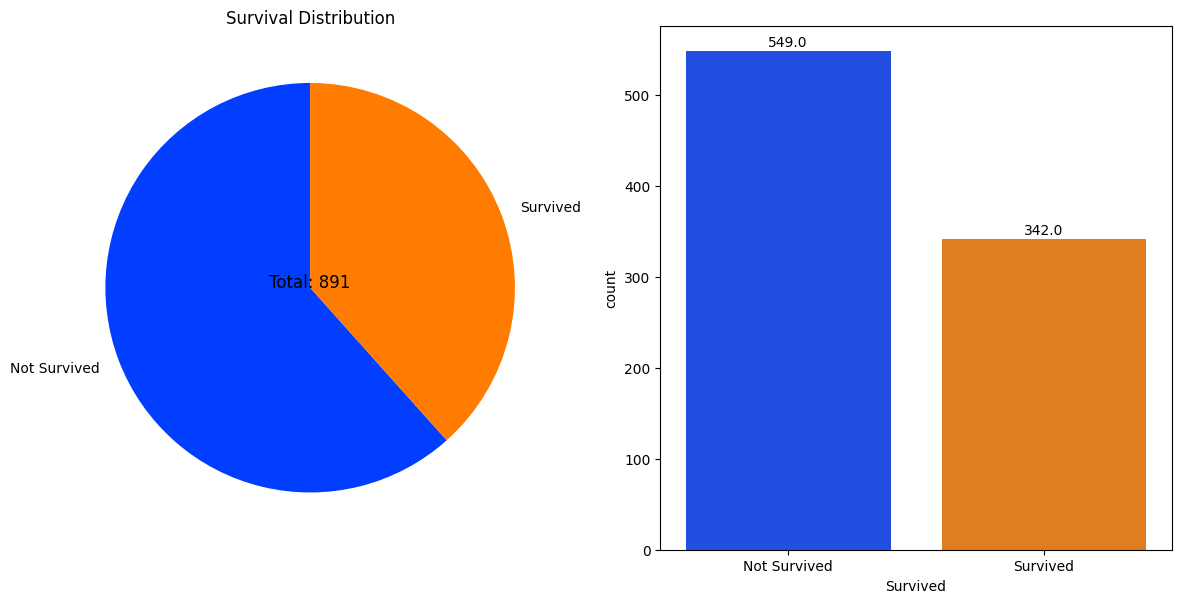

In [33]:
# Посмотрим общюю информацию о количестве выживших и погибших
# Создание областей для графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Рисование круговой диаграммы без процентов
axes[0].pie(survived_counts, labels=['Not Survived', 'Survived'], startangle=90)
axes[0].set_title('Survival Distribution')

# Рисование столбчатой диаграммы с установкой палитры
sns.countplot(data=data, x='Survived', ax=axes[1], palette='bright')

# Установка надписей по абсциссе
axes[1].set_xticklabels(['Not Survived', 'Survived'])

# Добавление общего количества на столбчатую диаграмму
totals = data['Survived'].value_counts().sum()
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2, height + 5, f'{height}', ha='center')


# Добавление общего количества на круговую диаграмму
axes[0].text(0, 0, f'Total: {totals}', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

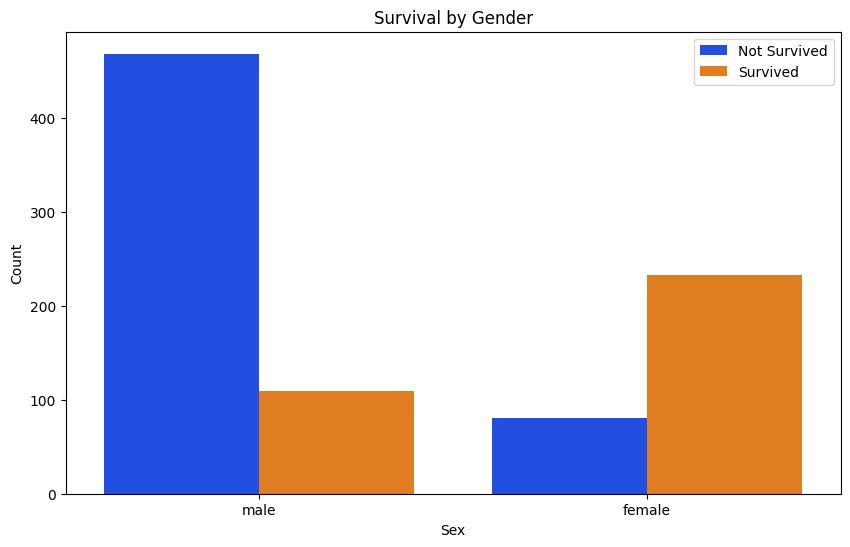

In [31]:
# Посмотрим распределение погибших и выживших по полам
# Построение графика
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

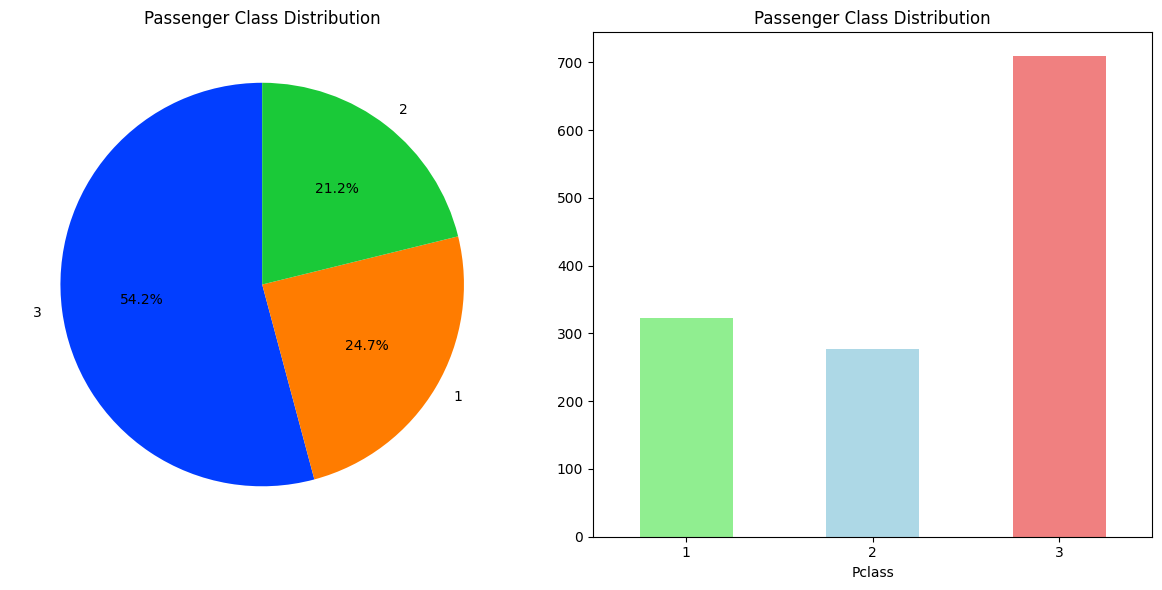

In [48]:
# Подсчет количества пассажиров по классу
class_counts = data['Pclass'].value_counts()

# Создание областей для графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Рисование круговой диаграммы
axes[0].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Passenger Class Distribution')

# Drawing the bar plot
ordered_class_counts = class_counts.sort_index()  # Ordering values by index
bar_plot = ordered_class_counts.plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightblue', 'lightcoral'])
bar_plot.set_title('Passenger Class Distribution')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0)  # Rotating labels horizontally

plt.tight_layout()
plt.show()

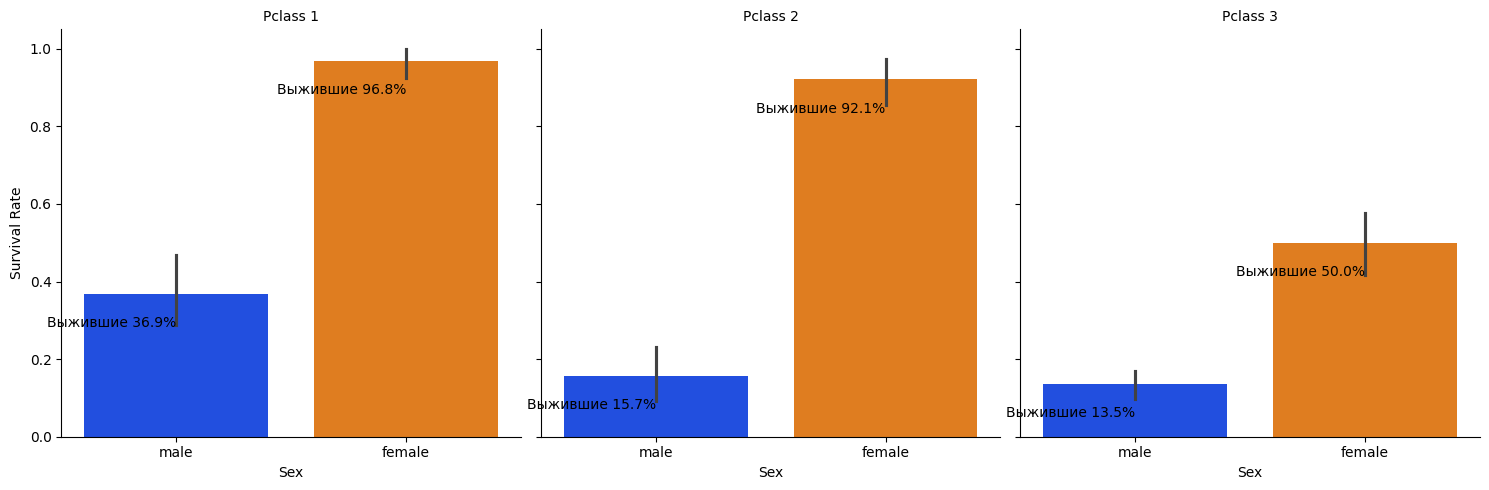

In [9]:
# Построим графики выживших в разрезе полов и классов
# Создаем график с помощью catplot
g = sns.catplot(data=data, y='Survived', x='Sex', col='Pclass', kind='bar', palette='bright')

# Настройка осей и заголовка
g.set_ylabels('Survival Rate')
g.set_xlabels('Sex')
g.set_titles(col_template='Pclass {col_name}')
plt.tight_layout()

# Добавляем проценты выживших над столбцами
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'Выжившие {p.get_height() * 100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='right', va='center_baseline', fontsize=10, color='black', xytext=(0, -20), textcoords='offset points')

# Показываем график
plt.show()


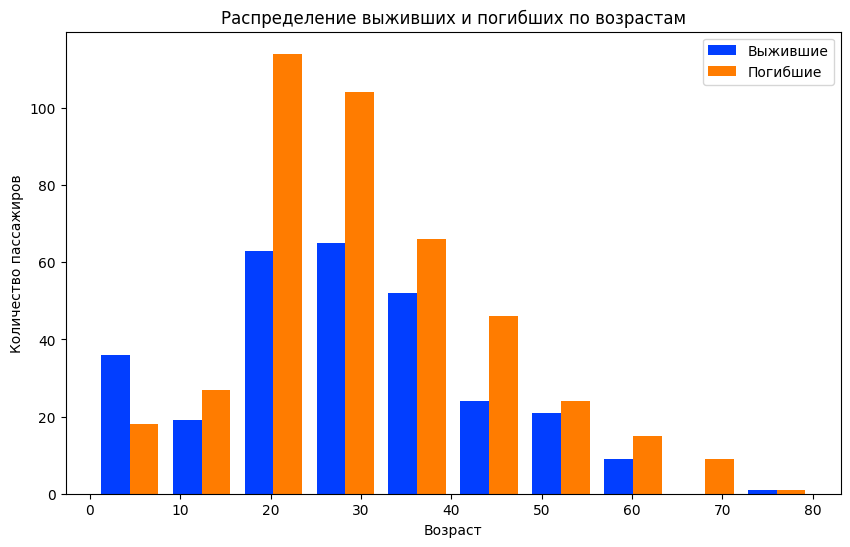

In [36]:
# Разделение пассажиров на категории "выжившие" и "погибшие" по возрасту
survived_age = data[data['Survived'] == 1]['Age']
died_age = data[data['Survived'] == 0]['Age']

# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.hist([survived_age, died_age], bins=10, label=['Выжившие', 'Погибшие'])

# Настройка графика
plt.title('Распределение выживших и погибших по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend()

# Отображение графика
plt.show()


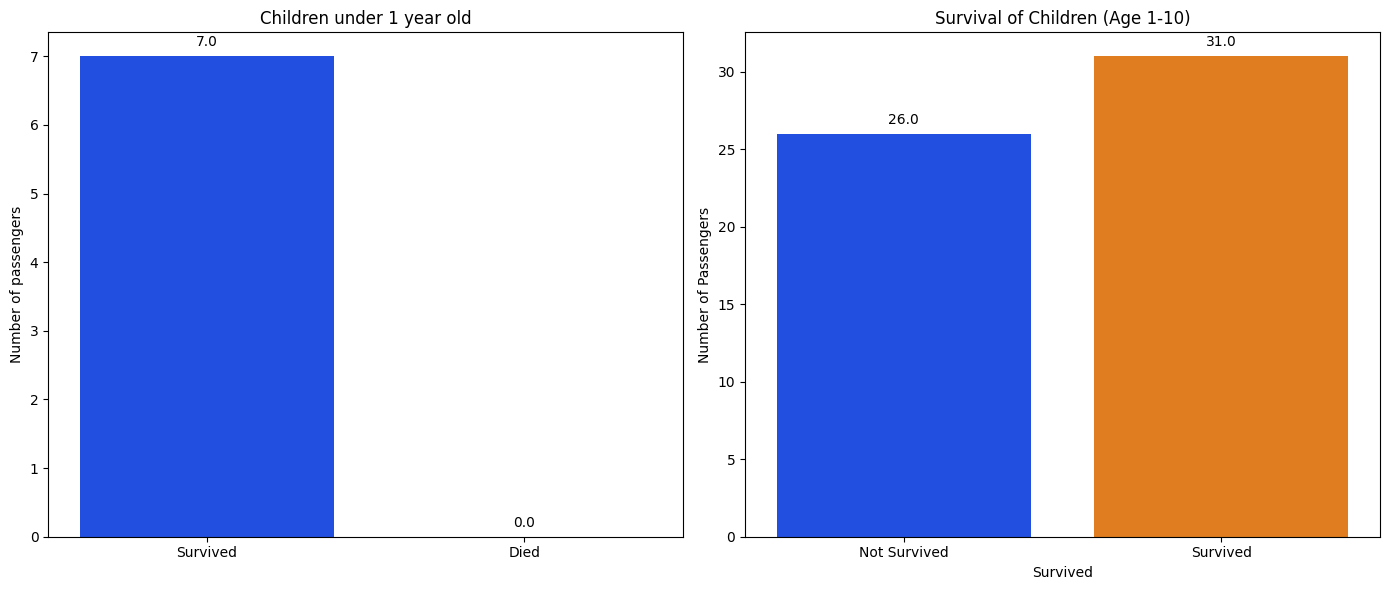

In [44]:
# Построим графики для детей
# Создание областей для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Разделение пассажиров до 1 года на категории "выжившие" и "погибшие"
survived_infant = data[(data['Survived'] == 1) & (data['Age'] < 1)]['Age']
died_infant = data[(data['Survived'] == 0) & (data['Age'] < 1)]['Age']

# Graph for children under 1 year old
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first graph
sns.barplot(x=['Survived', 'Died'], y=[len(survived_infant), len(died_infant)], palette='bright')
plt.title('Children under 1 year old')
plt.ylabel('Number of passengers')

# Добавление процентов над столбцами
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Рисование графика для детей от 1 до 10 лет
sns.countplot(data=data[(data['Age'] >= 1) & (data['Age'] <= 10)], x='Survived', ax=axes[1], palette='bright')
axes[1].set_title('Survival of Children (Age 1-10)')
axes[1].set_xticklabels(['Not Survived', 'Survived'])
axes[1].set_ylabel('Number of Passengers')

# Добавление процентов над столбцами
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Показать графики
plt.tight_layout()
plt.show()

In [45]:
# Количество погибших детей до 1 года
died_infant_count = len(data[(data['Survived'] == 0) & (data['Age'] < 1)])
died_child_count = len(data[(data['Survived'] == 1) & (data['Age'] < 10)])

print("Количество погибших детей до 1 года:", died_infant_count)
print("Количество погибших детей до 10 лет:", died_child_count)

Количество погибших детей до 1 года: 0
Количество погибших детей до 10 лет: 38


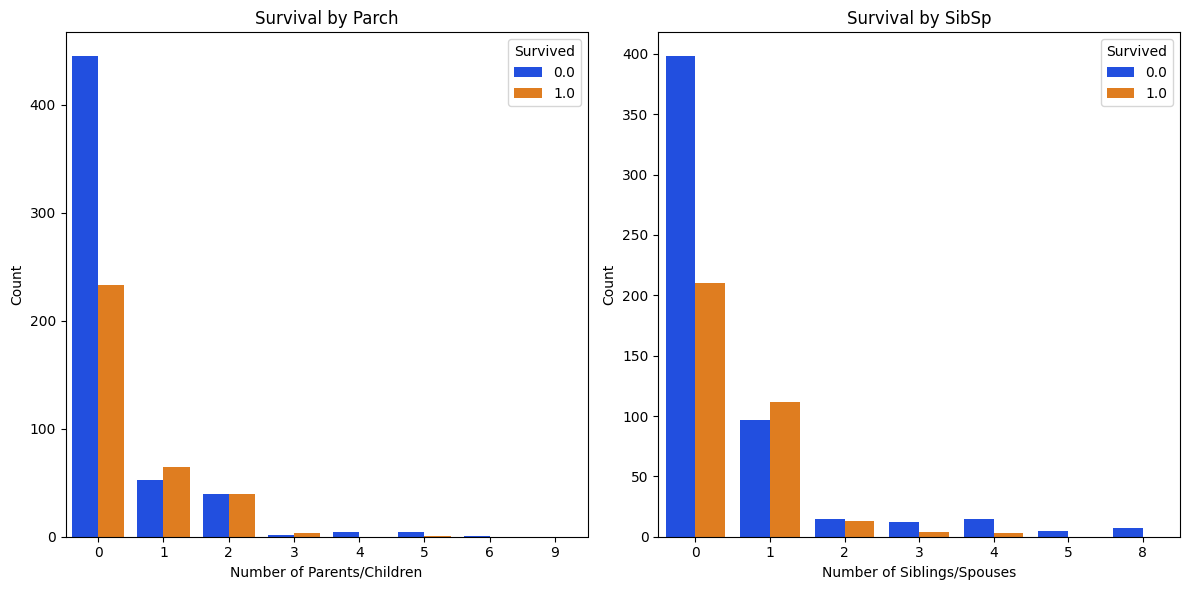

In [56]:
# Зависимость выживаемости от количества родителей/детей (Parch) и от количества братьев/сестер/супругов (SibSp)
# Создание фигуры и осей для графиков
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# График для столбца Parch
sns.countplot(data=data, x='Parch', hue='Survived', palette='bright', ax=axs[0])
axs[0].set_title('Survival by Parch')
axs[0].set_xlabel('Number of Parents/Children')
axs[0].set_ylabel('Count')

# График для столбца SibSp
sns.countplot(data=data, x='SibSp', hue='Survived', palette='bright', ax=axs[1])
axs[1].set_title('Survival by SibSp')
axs[1].set_xlabel('Number of Siblings/Spouses')
axs[1].set_ylabel('Count')

# Показать графики
plt.tight_layout()
plt.show()


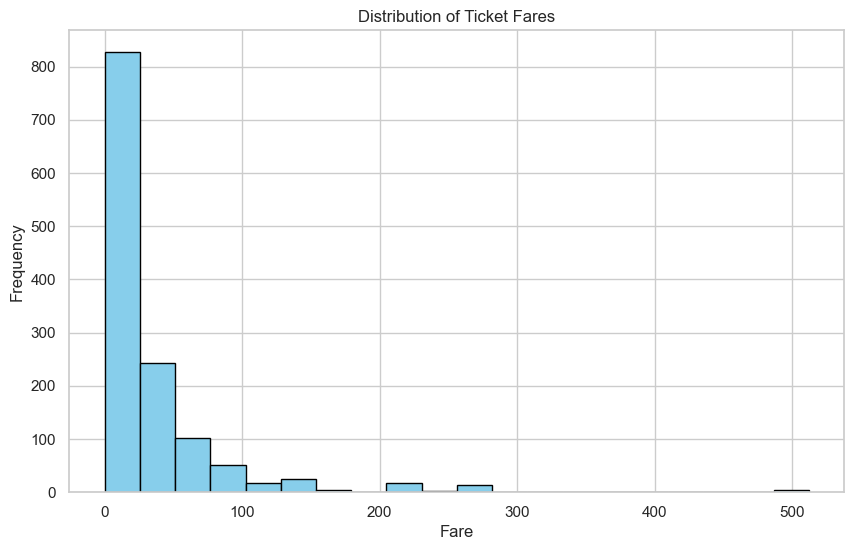

In [18]:
# Получение данных о стоимости билетов
fare_data = data['Fare']

# Построение гистограммы распределения цен билетов
plt.figure(figsize=(10, 6))
plt.hist(fare_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ticket Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


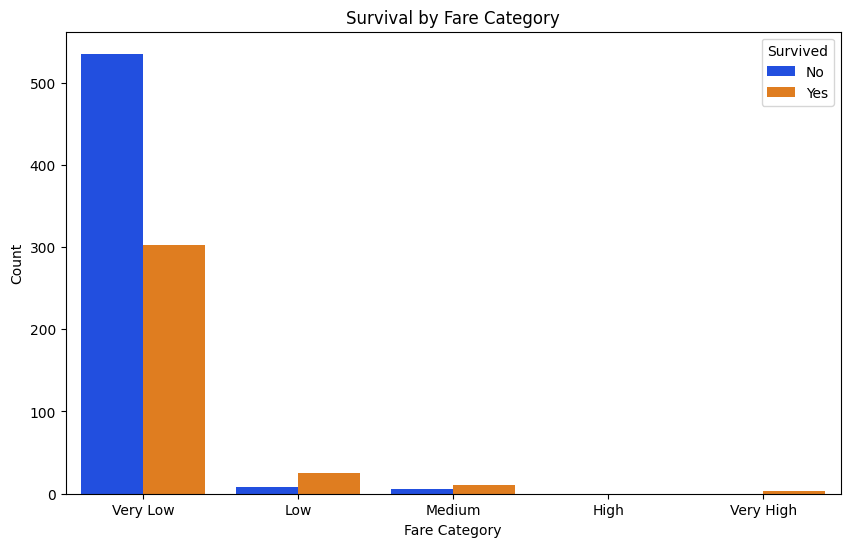

In [53]:
# Создание категориальной переменной для стоимости билетов
data['Fare_Category'] = pd.cut(data['Fare'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Построение графика
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Fare_Category', hue='Survived', palette='bright')
plt.title('Survival by Fare Category')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Показать график
plt.show()


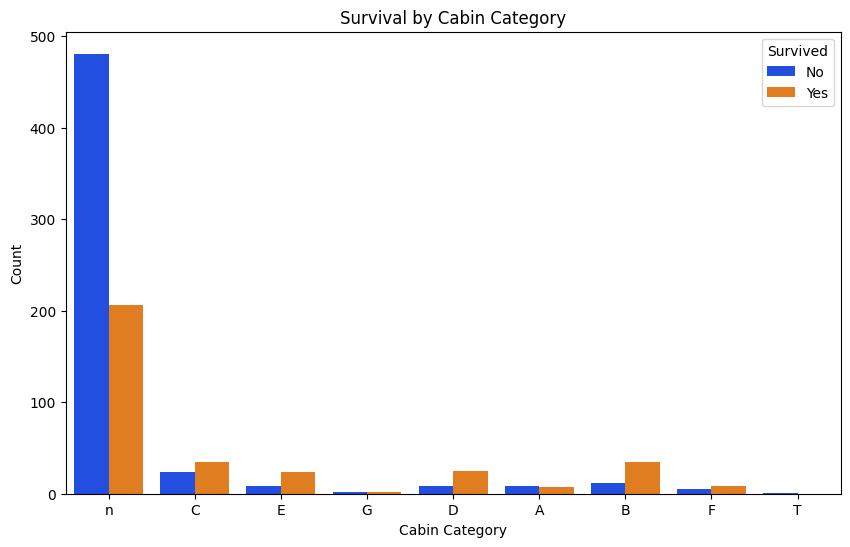

In [54]:
# количество выживших и погибших пассажиров в зависимости от категории кабины.
# Создание категориальной переменной для столбца с кабинами
data['Cabin_Category'] = data['Cabin'].astype(str).str[0]

# Построение графика
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Cabin_Category', hue='Survived', palette='bright')
plt.title('Survival by Cabin Category')
plt.xlabel('Cabin Category')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Показать график
plt.show()



A: кабины на верхних палубах, ближе к носу судна.  
B: также кабины на верхних палубах, но расположены немного ниже, обычно ближе к центру судна.  
C: кабины на центральных палубах, вблизи ресторанов и общественных помещений.  
D: кабины на средних палубах, обычно ближе к корме судна.  
E: кабины на нижних палубах, но все еще находятся выше ватерлинии.  
F и G: кабины на самых нижних палубах, ближе к воде.  

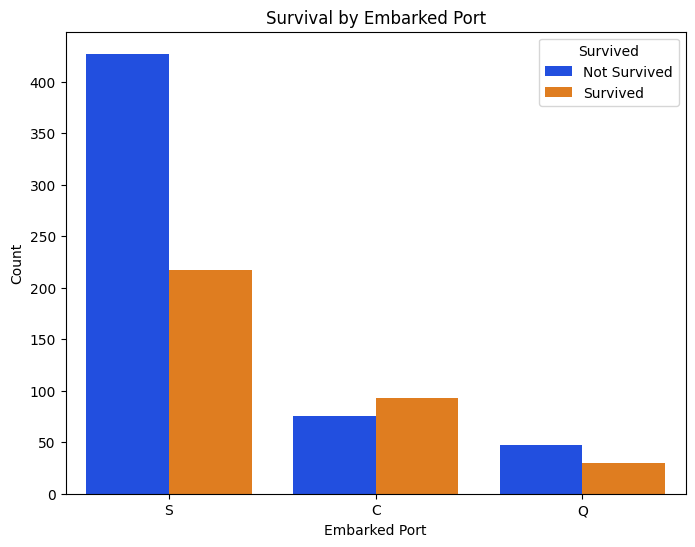

In [57]:
# Количество выживших и погибших пассажиров в зависимости от порта посадки.
# Создание графика
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Embarked', hue='Survived', palette='bright')

# Настройка графика
plt.title('Survival by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

# Показать график
plt.show()
